In [88]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [89]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [90]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [91]:
def compute_loss(y, tx, w, MAE=False):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    N = len(y)
    e = y - tx.dot(w)
    if MAE:
        loss = 1 / N * sum(abs(e))
    else:
        loss = 1 / (2 * N) * e.T.dot(e)
    return loss
    # ***************************************************
    raise NotImplementedError

# 2. Grid Search

Fill in the function `grid_search()` below:

In [92]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            losses[i][j] = compute_loss(y,tx,np.array([grid_w0[i], grid_w1[j]]))
    return losses
    # ***************************************************
    raise NotImplementedError

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678246, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.045 seconds


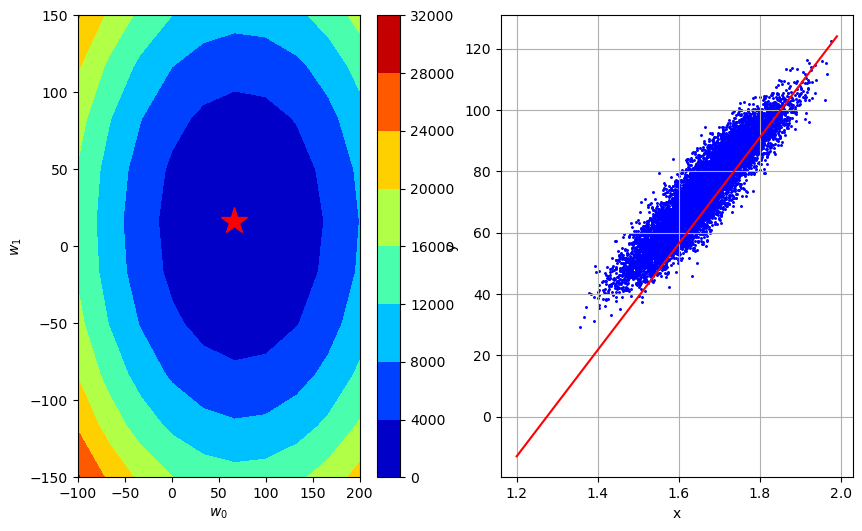

In [93]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [94]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    N = y.shape[0]
    e = y - tx.dot(w)
    return -1/N * tx.T.dot(e)
    # ***************************************************
    raise NotImplementedError

In [95]:
# Testing compute_gradient
w = np.array([100, 20])


Please fill in the functions `gradient_descent` below:

In [96]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma * grad
        # ***************************************************
        # raise NotImplementedError

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [97]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759165, w0=51.305745401473324, w1=9.435798704492441
GD iter. 1/49: loss=265.3024621089666, w0=66.69746902191562, w1=12.266538315840048
GD iter. 2/49: loss=37.878379550441835, w0=71.31498610804832, w1=13.115760199244335
GD iter. 3/49: loss=17.41021212017456, w0=72.70024123388814, w1=13.370526764265632
GD iter. 4/49: loss=15.568077051450487, w0=73.11581777164008, w1=13.446956733772023
GD iter. 5/49: loss=15.402284895265316, w0=73.24049073296567, w1=13.469885724623941
GD iter. 6/49: loss=15.387363601208621, w0=73.27789262136332, w1=13.476764421879516
GD iter. 7/49: loss=15.386020684743551, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.385899822261655, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638314, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=15.385887965652197, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543448, w0=73.29388305071, w1=13.47970527131719

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

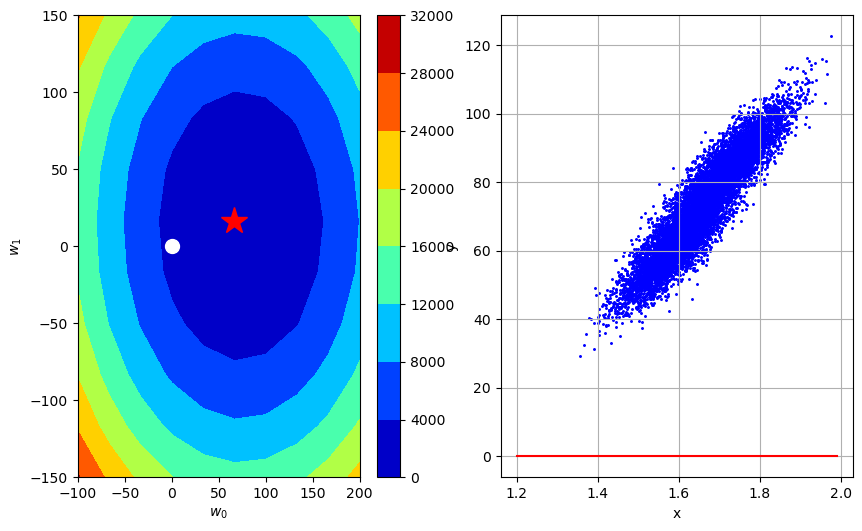

In [98]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 4. Stochastic gradient descent

In [99]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    n_iter = 0
    for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size=batch_size, num_batches=max_iters, shuffle=True):
        n_iter += 1
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        loss = compute_loss(minibatch_y, minibatch_tx, w)
        w = w - gamma * compute_gradient(minibatch_y, minibatch_tx,w)
        ws.append(w)
        losses.append(loss)
        # raise NotImplementedError

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [100]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 1/49: loss=2286.1011980637018, w0=6.761806264695406, w1=-0.07661807324823126
SGD iter. 2/49: loss=1504.9698689344043, w0=12.248098034068239, w1=-3.6173854591338577
SGD iter. 3/49: loss=944.7658268995692, w0=16.594972375246208, w1=-6.760999034469775
SGD iter. 4/49: loss=1605.503800601473, w0=22.26154770890493, w1=-4.708794020111132
SGD iter. 5/49: loss=434.8937501711207, w0=25.210763707000428, w1=-7.018025278247868
SGD iter. 6/49: loss=486.72706310965344, w0=28.330786345090267, w1=-8.40394555175504
SGD iter. 7/49: loss=241.5486451925221, w0=30.52873377481884, w1=-10.814158757617891
SGD iter. 8/49: loss=770.270050072031, w0=34.453705239866785, w1=-11.974065777850182
SGD iter. 9/49: loss=964.8276402399875, w0=38.84648941448768, w1=-10.966081706108037
SGD iter. 10/49: loss=5.36102967528075, w0=39.1739349725666, w1=-11.348591650877676
SGD iter. 11/49: loss=4017.4982739064244, w0=48.13774919856038, w1=12.26312307299349
SGD iter. 12/49: loss=424.06163738294424, w0=51.05000481022273,

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

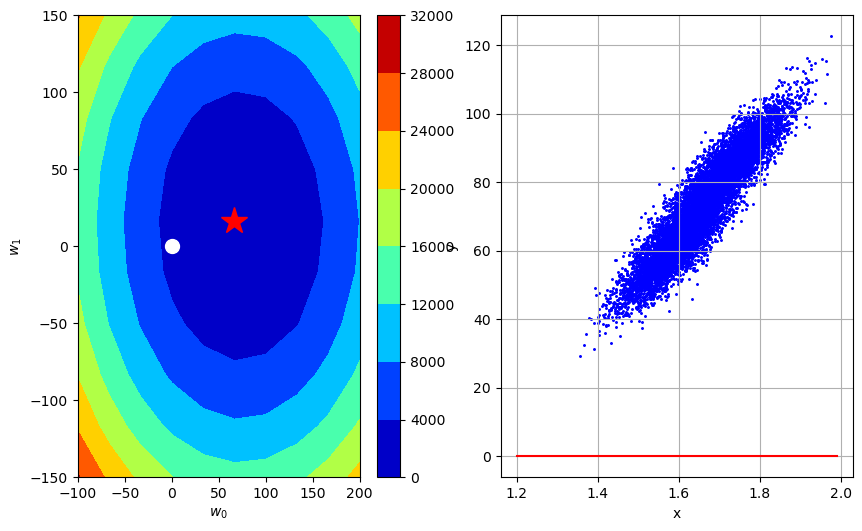

In [101]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

# 5. Effect of Outliers and MAE Cost Function

In [102]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

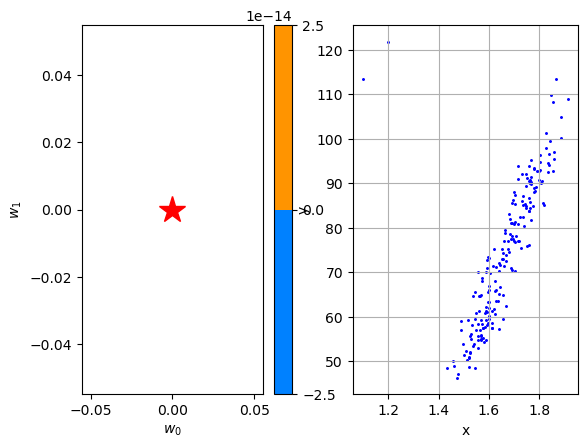

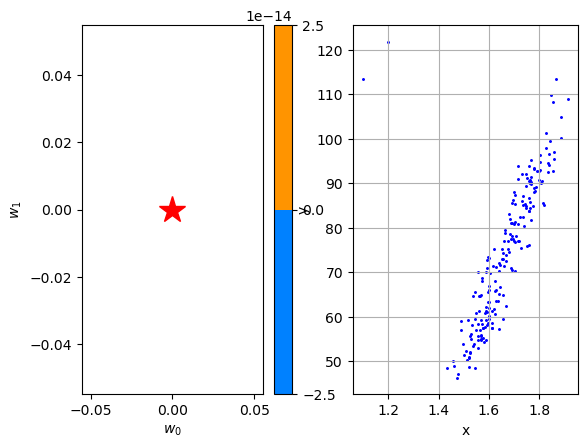

In [103]:
from plots import base_visualization
base_visualization(np.zeros((3,3)), np.zeros(3), np.zeros(3), 0, 1, height, weight)

In [104]:
y.shape, tx.shape

((202,), (202, 2))

In [105]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
losses, ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
# ***************************************************
# raise NotImplementedError


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
GD iter. 1/49: loss=318.28212470159644, w0=67.40170332798297, w1=10.041754328050114
GD iter. 2/49: loss=88.64235561651283, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.97477639885523, w0=73.46785662750146, w1=10.945512217574597
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=65.93222021235334, w0=74.05160722578589, w1=11.032481534481914
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249234, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889339, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225755, w1=11.034889001593541
G

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

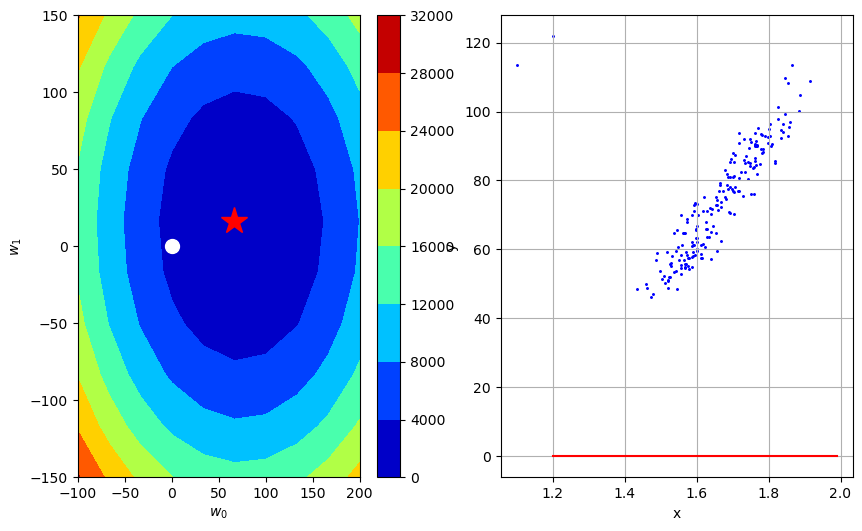

In [106]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 6. Subgradient descent

In [107]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    N = y.shape[0]
    e = y - tx.dot(w)

    # Replace the indices i, where e[i] == 0 with a random number from uniform[-1,1)
    e[e==0] = np.random.uniform(-1, 1, np.sum(e==0))

    return -1/N * tx.T.dot(e)
    # ***************************************************
    raise NotImplementedError

In [108]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        loss = compute_loss(y, tx, w, MAE=True)
        subgradient = compute_subgradient_mae(y,tx,w)
        # ***************************************************
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        w = w - gamma * subgradient
        # ***************************************************
        # raise NotImplementedError

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [109]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492632, w0=51.84746409844842, w1=7.7244264061924195
SubGD iter. 1/499: loss=22.220341756477932, w0=67.40170332798297, w1=10.041754328050114
SubGD iter. 2/499: loss=8.540676439415362, w0=72.06797509684336, w1=10.736952704607411
SubGD iter. 3/499: loss=6.90482836681024, w0=73.46785662750146, w1=10.945512217574597
SubGD iter. 4/499: loss=6.674709716875214, w0=73.88782108669889, w1=11.00808007146475
SubGD iter. 5/499: loss=6.644814813344379, w0=74.01381042445813, w1=11.026850427631798
SubGD iter. 6/499: loss=6.639117501635081, w0=74.05160722578589, w1=11.032481534481914
SubGD iter. 7/499: loss=6.637802926368859, w0=74.06294626618423, w1=11.034170866536943
SubGD iter. 8/499: loss=6.637503390841279, w0=74.06634797830372, w1=11.034677666153454
SubGD iter. 9/499: loss=6.637417848906229, w0=74.06736849193958, w1=11.034829706038408
SubGD iter. 10/499: loss=6.637392186325721, w0=74.06767464603033, w1=11.034875318003895
SubGD iter. 11/499: loss=6.637384487551568,

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

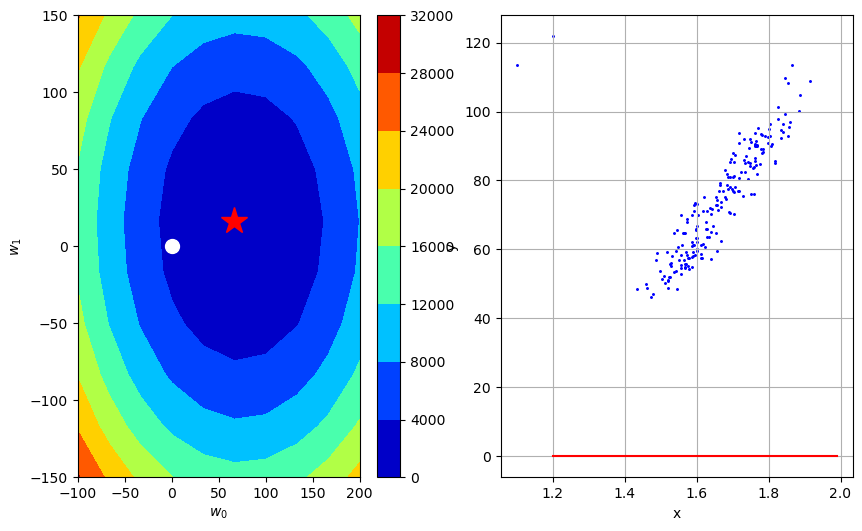

In [110]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [111]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    n_iter = 0

    for minibatch_y, minibatch_tx in batch_iter(y,tx,batch_size, max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        n_iter += 1
        subgradient = compute_subgradient_mae(minibatch_y,minibatch_tx,w)
        w = w - gamma * subgradient
        loss = compute_loss(minibatch_y, minibatch_tx, w, MAE=True)
        ws.append(w)
        losses.append(loss)
        # ***************************************************
        # raise NotImplementedError

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [116]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 1/499: loss=25.13894293799288, w0=37.44964812601601, w1=-39.27474725807929
SubSGD iter. 2/499: loss=3.6385978378255786, w0=46.56353568878515, w1=-40.835719412120916
SubSGD iter. 3/499: loss=18.37044902910722, w0=23.132340594002653, w1=-15.033854205546461
SubSGD iter. 4/499: loss=5.483605757227998, w0=38.42482486503857, w1=-28.601599091732766
SubSGD iter. 5/499: loss=12.664921236115958, w0=68.17326275147153, w1=-27.01697155799524
SubSGD iter. 6/499: loss=6.289879899761928, w0=88.67765126863901, w1=-19.86056726282455
SubSGD iter. 7/499: loss=5.008778378991465, w0=102.40897372962448, w1=-7.630115180387627
SubSGD iter. 8/499: loss=1.278607324434148, w0=103.60663800602443, w1=-6.165162944744017
SubSGD iter. 9/499: loss=58.720781282226895, w0=61.30585421976028, w1=50.8506424281733
SubSGD iter. 10/499: loss=63.358259585885534, w0=29.127162570384847, w1=1.025367890353472
SubSGD iter. 11/499: loss=15.464265453491308, w0=71.5216946293024, w1=38.78606387409013
SubSGD iter. 12/499: lo

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

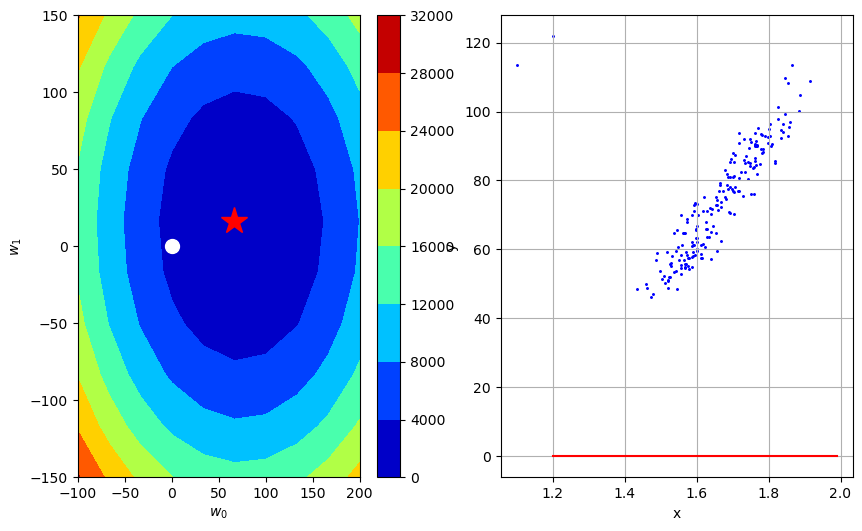

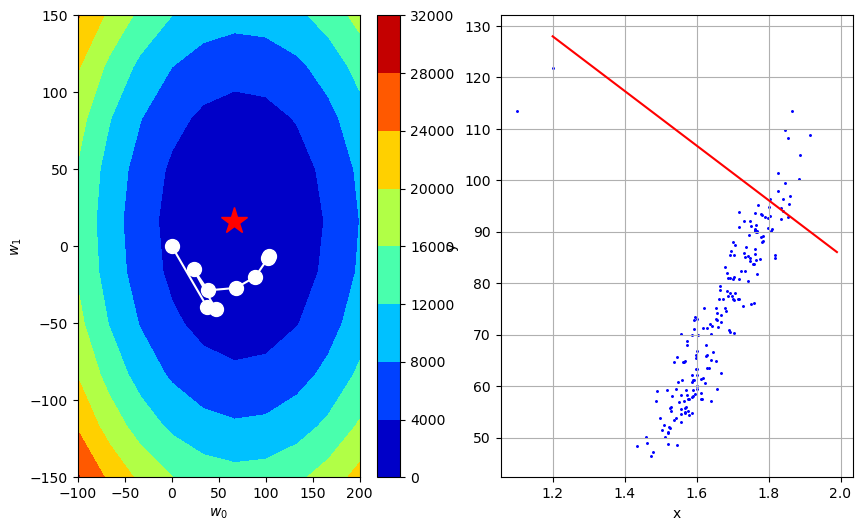

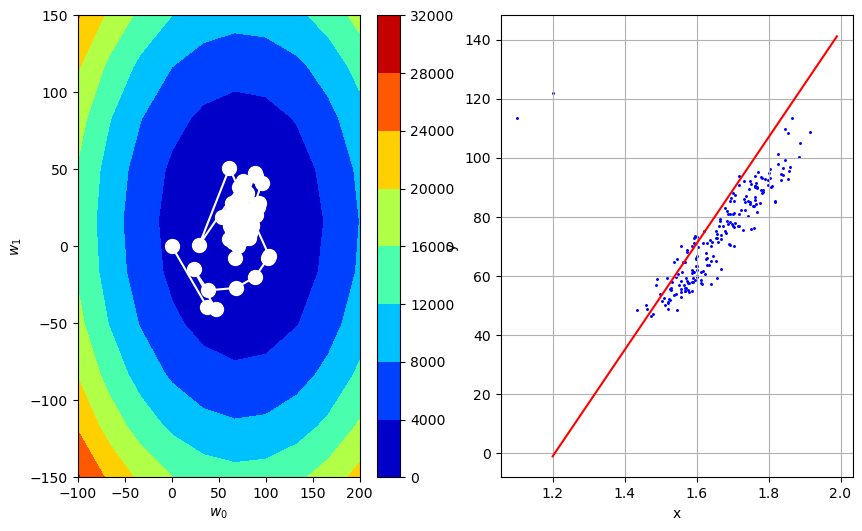

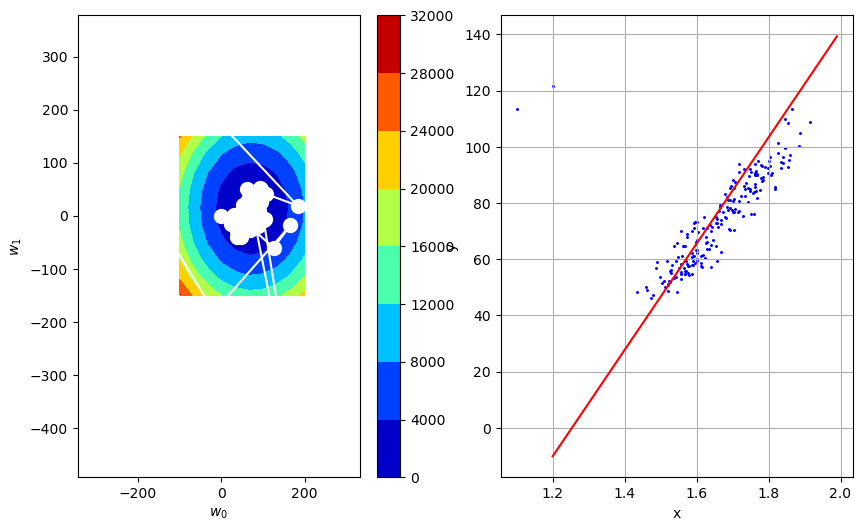

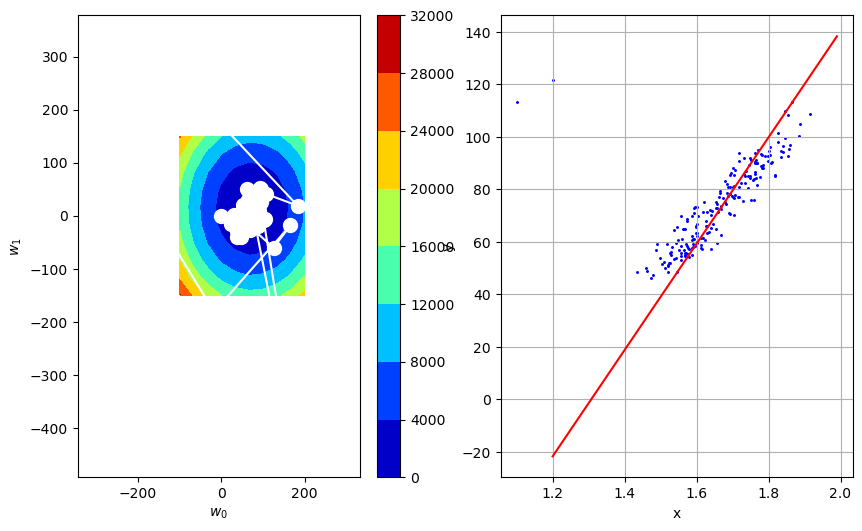

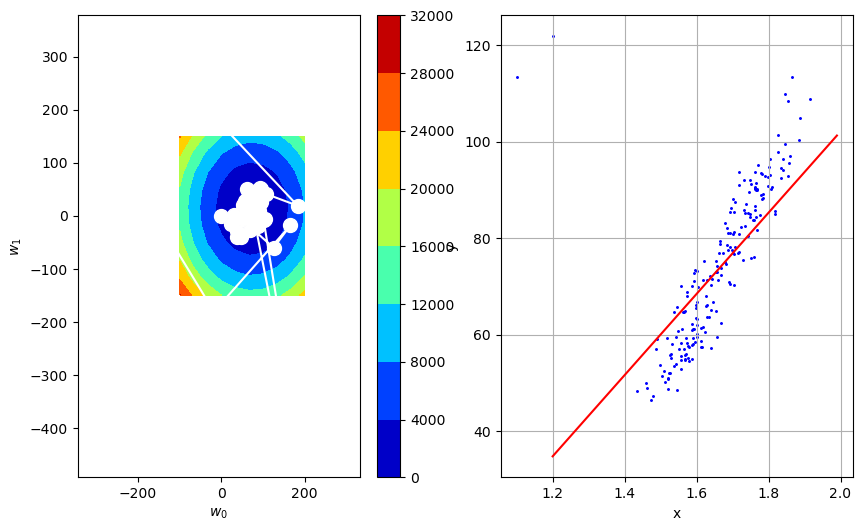

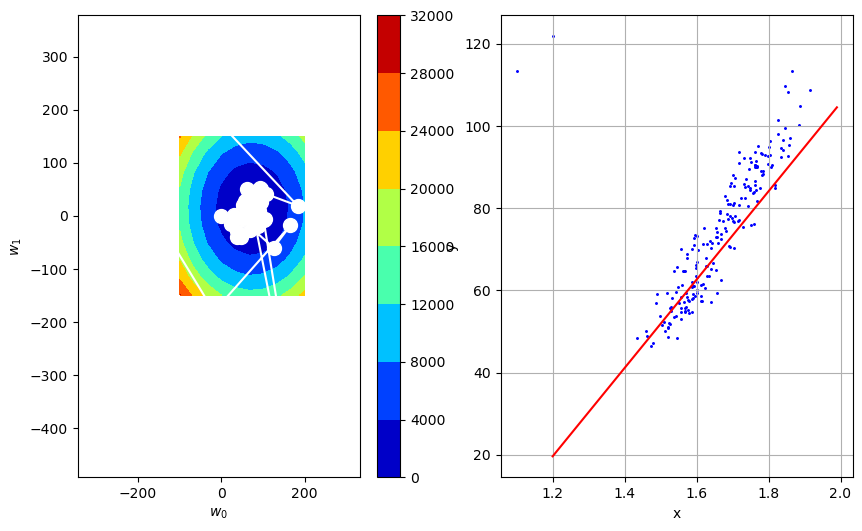

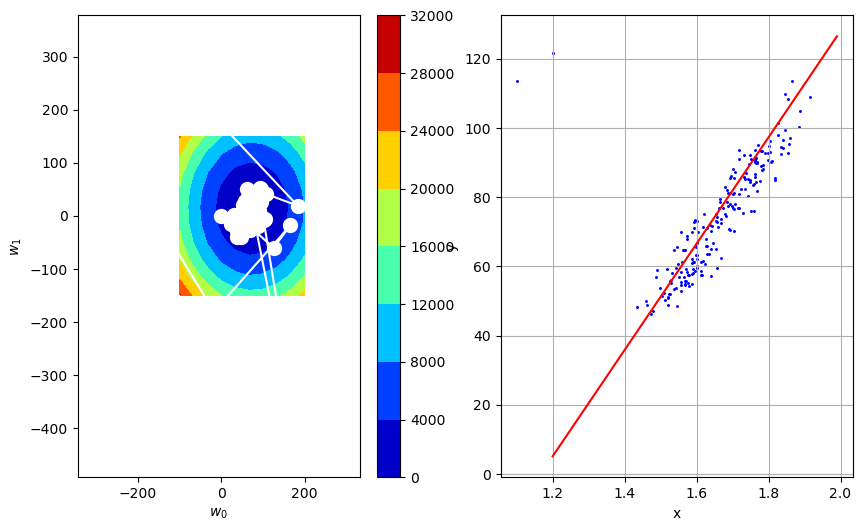

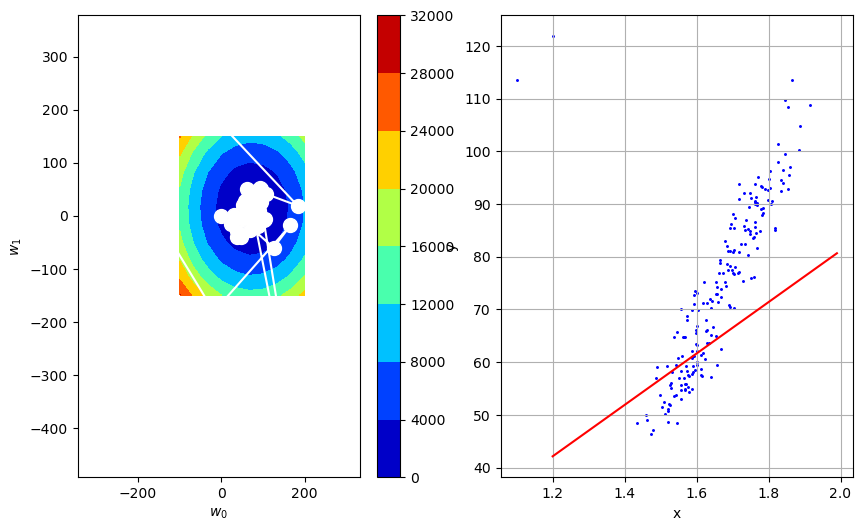

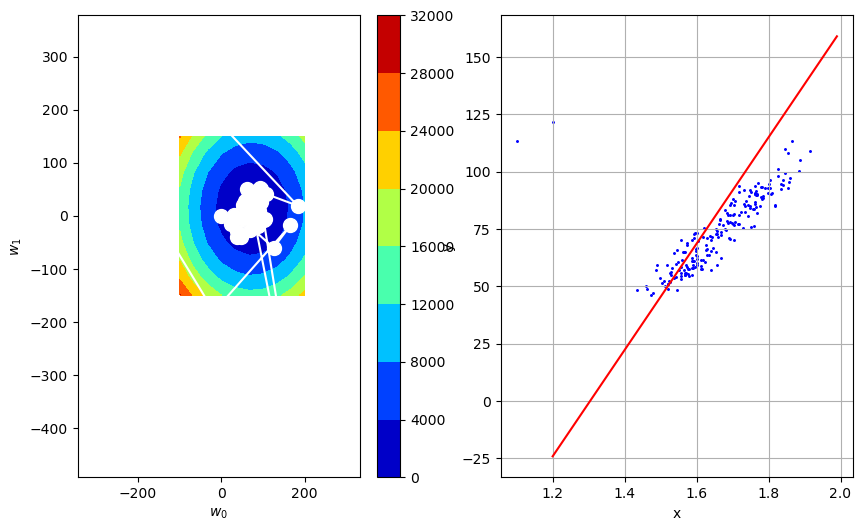

In [117]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))